In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from time import strftime

In [2]:
dfAvocado = pd.read_csv('avocado.csv',header=0)

In [3]:
dfAvocadoNY = dfAvocado[dfAvocado['region'] == 'NewYork']
dfNYcon = dfAvocadoNY[dfAvocadoNY['type'] == 'conventional']

In [10]:
x = dfNYcon['AveragePrice'].values.reshape(-1, 1)
y = dfNYcon['Total Volume'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(x,y)
slope = model.coef_[0]
intercept = model.intercept_
print("intercept: ", intercept)
print("slope: ", slope)

prediction_col = []
for price in dfNYcon['AveragePrice']:
    prediction = (slope * price) + intercept
    prediction_col.append(prediction)

intercept:  [2433660.061456]
slope:  [-757701.69756948]


In [6]:
dfNYcon.size

2366

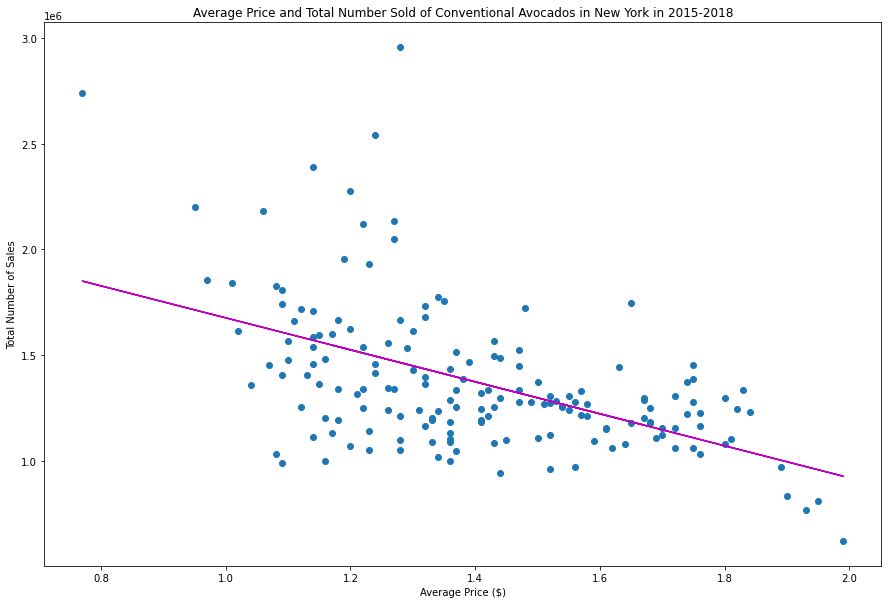

In [11]:
fig = plt.figure(figsize=(15,10))
plt.plot(x, prediction_col, color='m')
plt.scatter(x, y)
plt.xlabel('Average Price ($)')
plt.ylabel('Total Number of Sales')
plt.title('Average Price and Total Number Sold of Conventional Avocados in New York in 2015-2018')
plt.show()

In [12]:
elasticity_col = []
for i in range(1456,1508):
    elasticity = (1/dfNYcon.loc[i,'Total Volume'])/(1/dfNYcon.loc[i,'AveragePrice'])
    elasticity_col.append(elasticity)
for i in range(4264,4316):
    elasticity = (1/dfNYcon.loc[i,'Total Volume'])/(1/dfNYcon.loc[i,'AveragePrice'])
    elasticity_col.append(elasticity)
for i in range(7100,7153):
    elasticity = (1/dfNYcon.loc[i,'Total Volume'])/(1/dfNYcon.loc[i,'AveragePrice'])
    elasticity_col.append(elasticity)
for i in range(8814,8826):
    elasticity = (1/dfNYcon.loc[i,'Total Volume'])/(1/dfNYcon.loc[i,'AveragePrice'])
    elasticity_col.append(elasticity)
dfNYcon = dfNYcon.assign(Elasticity=elasticity_col)

In [13]:
dfNY = dfNYcon[['AveragePrice','Total Volume','Elasticity']]
dfNY = dfNY.sort_values(by=['AveragePrice'])
pd.set_option('display.max_rows', dfNY.shape[0]+1)
dfNY

,AveragePrice,Total Volume,Elasticity
4297,0.77,2740587.86,2.809616e-07
4310,0.95,2202127.86,4.314009e-07
1466,0.97,1856337.85,5.225342e-07
4313,1.01,1840344.27,5.488104e-07
4311,1.02,1615465.33,6.313970e-07
1462,1.04,1357393.34,7.661744e-07
1464,1.06,2180520.22,4.861225e-07
4315,1.07,1454164.32,7.358178e-07
4294,1.08,1827100.26,5.911006e-07
4300,1.08,1030786.84,1.047743e-06
